In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta 

In [1]:
def findMaxMin(date_list):
    
    max_date = max(date_list)
    min_date = min(date_list)
    
    return max_date, min_date        


def dateDiff(min_date, max_date):
    min_date = str(min_date)
    max_date = str(max_date)
    
    '''
    print(min_date)
    print(max_date)
    '''
    
    min_date_yr = int(min_date[:4])
    min_date_m = int(min_date[4:6])
    min_date_d = int(min_date[6:])
    
    max_date_yr = int(max_date[:4])
    max_date_m = int(max_date[4:6])
    max_date_d = int(max_date[6:])
    
    ''' 
    print(min_date_yr)
    print(min_date_m)
    print(min_date_d)
    
    print(max_date_yr)
    print(max_date_m)
    print(max_date_d)
    '''
        
    diff = datetime(max_date_yr, max_date_m, max_date_d) - datetime(min_date_yr, min_date_m, min_date_d)
    return diff


#print(dateDiff('20081113', '20101012'))

In [20]:
file = pd.read_csv('fullday2.csv')
file = file.set_index('Filename')

temp_ID = ''
date_list = []

count = 1

AD_1yr = 0
MCI_1yr = 0
NC_1yr = 0

AD_1_5yr = 0
MCI_1_5yr = 0
NC_1_5yr = 0

AD_2yr = 0
MCI_2yr = 0
NC_2yr = 0

AD_3yr = 0
MCI_3yr = 0
NC_3yr = 0

for filename in file.index:
    ID = str(file.loc[filename, 'ID'])
    day = str(file.loc[filename, 'day'])   
    group = str(file.loc[filename, 'Group'])
    
    if group == "MC":
        group = "MCI"
    
    #print(day)
    if not ID[0].isdigit():
        ID_num = ID.find("_")
        ID = ID[ID_num+1:ID_num+11]
        day = day[-32:-24]
        group = group[-29:-27]
        if group == "CI":
            group = "MCI"   

    """ 
    print(ID)
    print(day)
    print(group)
    """
    # Find date diff for each subject
    if temp_ID == '':
        temp_ID = ID
        temp_group = group

    if temp_ID == ID:
        #print(day)
        date_list.append(day)
    if temp_ID != ID:
        count+=1
        max_date, min_date = findMaxMin(date_list)
        #print('%s / %s = %s' %(temp_ID, group, date_list))
        #print('min_date = %s   max_date = %s' %(min_date, max_date))
        
        diff = dateDiff(min_date, max_date)
        #print(diff)
        
        
         # Find 1yr, 2yr for each subject (AD,MCI,NC)
        if 0 < diff.days <= 365:
            if group == 'CN':
                NC_1yr += 1
            elif group == 'MCI':
                MCI_1yr += 1
            elif group == 'AD':
                AD_1yr += 1      
        elif 365 < diff.days <= 730:
            if group == 'CN':
                NC_1_5yr += 1
            elif group == 'MCI':
                MCI_1_5yr += 1
            elif group == 'AD':
                AD_1_5yr += 1  
        elif 730 < diff.days <= 1095:
            if group == 'CN':
                NC_2yr += 1
            elif group == 'MCI':
                MCI_2yr += 1
            elif group == 'AD':
                AD_2yr += 1  
        elif 1095 < diff.days:
            if group == 'CN':
                NC_3yr += 1
            elif group == 'MCI':
                MCI_3yr += 1
            elif group == 'AD':
                AD_3yr += 1  
        #print(date_list)
        #print("-------------------------------------------------")
        # reset parameters 
        date_list = []
        date_list.append(day)
        temp_ID = ID

print(count)
print("NC_1yr = ", NC_1yr)
print("MCI_1yr = ", MCI_1yr)
print("AD_1yr = ", AD_1yr)
        
print("NC_1_5yr = ", NC_1_5yr)
print("MCI_1_5yr = ", MCI_1_5yr)
print("AD_1_5yr = ", AD_1_5yr)
        
print("NC_2yr = ", NC_2yr)
print("MCI_2yr = ", MCI_2yr)
print("AD_2yr = ", AD_2yr)

print("NC_3yr = ", NC_3yr)
print("MCI_3yr = ", MCI_3yr)
print("AD_3yr = ", AD_3yr)


639
NC_1yr =  1
MCI_1yr =  6
AD_1yr =  0
NC_1_5yr =  60
MCI_1_5yr =  75
AD_1_5yr =  37
NC_2yr =  53
MCI_2yr =  99
AD_2yr =  47
NC_3yr =  80
MCI_3yr =  131
AD_3yr =  49


In [21]:
MCI_2yr += 1

df = pd.DataFrame(index = ['0-1yr', '1-2yr', '2-3yr', '3-4yr'], columns = ['NC', 'MCI', 'AD'])

yr_0 = []
yr_1 = []
yr_2 = []
yr_3 = []

yr_0.append(NC_1yr)
yr_0.append(MCI_1yr)
yr_0.append(AD_1yr)

yr_1.append(NC_1_5yr)
yr_1.append(MCI_1_5yr)
yr_1.append(AD_1_5yr)

yr_2.append(NC_2yr)
yr_2.append(MCI_2yr)
yr_2.append(AD_2yr)

yr_3.append(NC_3yr)
yr_3.append(MCI_3yr)
yr_3.append(AD_3yr)

df.loc['0-1yr'] = yr_0
df.loc['1-2yr'] = yr_1
df.loc['2-3yr'] = yr_2
df.loc['3-4yr'] = yr_3


print(df)


'''
print("NC_1yr = ", NC_1yr)
print("MCI_1yr = ", MCI_1yr)
print("AD_1yr = ", AD_1yr)
        
print("NC_1_5yr = ", NC_1_5yr)
print("MCI_1_5yr = ", MCI_1_5yr)
print("AD_1_5yr = ", AD_1_5yr)
        
print("NC_2yr = ", NC_2yr)
print("MCI_2yr = ", MCI_2yr)
print("AD_2yr = ", AD_2yr)
'''

       NC  MCI  AD
0-1yr   1    6   0
1-2yr  60   75  37
2-3yr  53  100  47
3-4yr  80  131  49


'\nprint("NC_1yr = ", NC_1yr)\nprint("MCI_1yr = ", MCI_1yr)\nprint("AD_1yr = ", AD_1yr)\n        \nprint("NC_1_5yr = ", NC_1_5yr)\nprint("MCI_1_5yr = ", MCI_1_5yr)\nprint("AD_1_5yr = ", AD_1_5yr)\n        \nprint("NC_2yr = ", NC_2yr)\nprint("MCI_2yr = ", MCI_2yr)\nprint("AD_2yr = ", AD_2yr)\n'

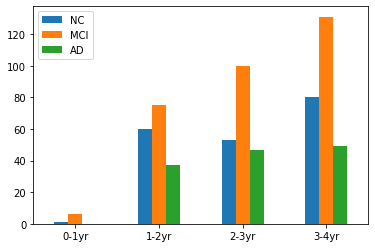

In [22]:
df.plot.bar(rot=0)